<a href="https://colab.research.google.com/github/jincy-p-janardhanan/SPP-Pneumonia-Net/blob/ml/SPP_Pneumonia_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preliminaries

Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import dependencies

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
import glob
import h5py
import math
import time
from tensorflow import keras
from tensorflow.python.client import device_lib
from random import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
print(device_lib.list_local_devices())
print(tf.__version__)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10713912646048409456
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11345264640
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8869017954382892346
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]
2.6.0


# Downloading dataset from kaggle

Reference site: https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a


In [ ]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle/"

In [ ]:
# % cd /content/drive/MyDrive/kaggle
# % pwd

/content/drive/MyDrive/kaggle


'/content/drive/MyDrive/kaggle'

In [ ]:
# % ls

chest_xray/  kaggle.json


In [ ]:
# ! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:51<00:00, 30.9MB/s]
100% 2.29G/2.29G [00:51<00:00, 48.0MB/s]


In [ ]:
# !unzip \*.zip && rm *.zip

In [ ]:
# % ls

# Model Architecture

Reference: [SPP-COVID-Net](https://github.com/SitiRaihanah/SPP-COVID-Net/blob/master/SPP-COVID-Net.py)

In [87]:
def SPPCovidNet(class_no,input_height,input_width): 
    # input_images=tf.keras.layers.Input(shape=(input_height,input_width,3))
    input_images=tf.keras.layers.Input(shape=(input_height,input_width,1))

    x = tf.keras.layers.Conv2D(8,(3,3),strides=(1,1),padding='same',use_bias=False)(input_images)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)
    x = tf.keras.layers.MaxPooling2D((2,2),strides=(2,2))(x)

    x = tf.keras.layers.Conv2D(16,(3,3),strides=(1,1),padding='same',use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)
    x = tf.keras.layers.MaxPooling2D((2,2),strides=(2,2))(x)

    #first triple
    x = tf.keras.layers.Conv2D(32,(3,3),strides=(1,1),padding='same',use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Conv2D(16,(1,1),strides=(1,1),padding='same',use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Conv2D(32,(3,3),strides=(1,1),padding='same',use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)
    x = tf.keras.layers.MaxPooling2D((2,2),strides=(2,2))(x)

    #second triple
    x = tf.keras.layers.Conv2D(64,(3,3),strides=(1,1),padding='same',use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Conv2D(32,(1,1),strides=(1,1),padding='same',use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Conv2D(64,(3,3),strides=(1,1),padding='same',use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)
    x = tf.keras.layers.MaxPooling2D((2,2),strides=(2,2))(x)

    #third triple
    x = tf.keras.layers.Conv2D(128,(3,3),strides=(1,1),padding='same',use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Conv2D(64,(1,1),strides=(1,1),padding='same',use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Conv2D(128,(3,3),strides=(1,1),padding='same',use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)
    x = tf.keras.layers.MaxPooling2D((2,2),strides=(2,2))(x)

    #fourth triple
    x = tf.keras.layers.Conv2D(256,(3,3),strides=(1,1),padding='same',use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Conv2D(128,(1,1),strides=(1,1),padding='same',use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    x = tf.keras.layers.Conv2D(256,(3,3),strides=(1,1),padding='same',use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)

    #ending network
    # L1 = tf.keras.layers.MaxPooling2D((7,7),strides=(1,1),padding='valid')(x)
    L1 = tf.keras.layers.MaxPooling2D((4,4),strides=(1,1),padding='valid')(x)
    # L2 = tf.keras.layers.MaxPooling2D((6,6),strides=(1,1),padding='valid')(x)
    L2 = tf.keras.layers.MaxPooling2D((4,4),strides=(1,1),padding='valid')(x)
    L3 = tf.keras.layers.MaxPooling2D((4,4),strides=(1,1),padding='valid')(x)

    FL1 = tf.keras.layers.Flatten()(L1)
    FL2 = tf.keras.layers.Flatten()(L2)
    FL3 = tf.keras.layers.Flatten()(L3)
    
    x = tf.keras.layers.Concatenate(axis=1)([FL1,FL2,FL3])
    x = tf.keras.layers.Dense(class_no,activation='softmax')(x)

    # Create model.
    model=tf.keras.models.Model(inputs=input_images,outputs=x)
    model.summary()

    return model

# Utility Functions

## Divide dataset to train and test sets

In [ ]:
def divide_data(iter_no,image1,image2,image3,div_data1,div_data2,div_data3):
    print("image1",image1.shape)
    print("image2",image2.shape)
    print("image3",image3.shape)
    print("div_data1",div_data1)
    print("div_data2",div_data2)
    print("div_data3",div_data3)
    
    delete_index1=np.arange(div_data1[iter_no],div_data1[iter_no+1])
    train_data1=np.delete(image1,delete_index1,axis=0)
    test_data1=image1[div_data1[iter_no]:div_data1[iter_no+1]]

    delete_index2=np.arange(div_data2[iter_no],div_data2[iter_no+1])
    train_data2=np.delete(image2,delete_index2,axis=0)
    test_data2=image2[div_data2[iter_no]:div_data2[iter_no+1]]

    delete_index3=np.arange(div_data3[iter_no],div_data3[iter_no+1])
    train_data3=np.delete(image3,delete_index3,axis=0)
    test_data3=image3[div_data3[iter_no]:div_data3[iter_no+1]]

    #combine the data
    train_data=np.concatenate((train_data1,train_data2,train_data3),axis=0)
    test_data=np.concatenate((test_data1,test_data2,test_data3),axis=0)

    return train_data,test_data

## Convert dataset to h5 file

- Convert images to numpy array and save in h5 file
- For faster training <br>
[Github Reference](https://github.com/selvam85/Cat-Dog-Classifier/blob/master/DNN_using_plain_TF_Cat_vs_Dog_classifier_Kaggle_dataset/Convert%20Images%20to%20Numpy%20array%20and%20save%20in%20h5%20fomat%20v2.1.ipynb) <br>

Other references: 
[1](https://medium.datadriveninvestor.com/speed-up-your-image-training-on-google-colab-dc95ea1491cf), 
[2](https://medium.com/@selvam85/how-to-work-with-large-training-dataset-in-google-colab-platform-c3499fc10c24)

Normalize and write data to h5 file

In [ ]:
def normalize_and_write_data_into_h5_file(dest_filepath, filepaths_list, n_px, n_channels = 3):
    
    '''
        This function converts images to numpy arrays and writes the array data into a h5 file.
        
        dest_filepath - the name of the file with full path that is being created
        filepaths_list - source image file paths which is being converted to numpy arrays
        n_px - number of pixels - will be used as image's height and width
        n_channels - 3 for rgb
    '''
    
    data_shape = (len(filepaths_list), n_px * n_px * n_channels)
    dataset_name = "input_data"

    with h5py.File(dest_filepath, 'a') as f:
        
        f.create_dataset(dataset_name, data_shape, np.float32)
        
        for i in range(len(filepaths_list)):
            #if (i+1) % 512 == 0:
            #    print('{}/{} files converted'.format((i+1), len(filepaths_list)))

            filepath = filepaths_list[i]
            img = cv2.imread(filepath)
            img = cv2.resize(img, (n_px, n_px), interpolation=cv2.INTER_CUBIC)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # To convert colormap from BGR to GRAY
            
            #Normalize the image - convert the each pixel value between 0 and 1
            img = img / 255
            #Reshape the image - roll it up into a column vector
            img = img.ravel()
            
            #img[None] makes it a proper array instead of rank 1 array
            f[dataset_name][i, ...] = img[None]

Write corresponding labels for each image into the h5 file

In [ ]:
def write_labels_into_h5_file(dest_filepath, labels):
    dataset_name = "input_labels"
    with h5py.File(dest_filepath, 'a') as f:
        f.create_dataset(dataset_name, (len(labels),), np.int8)
        f[dataset_name][...] = labels

Numbers for labelling
- 0: Normal
- 1: Bacterial
- 2: Viral

In [ ]:
def set_label(filepath):
  if 'bacteria' in filepath:
    return 1
  elif 'virus' in filepath:
    return 2
  else:
    return 0

Combined function for converting images and writing labels

In [ ]:
def get_no_h5_files(src_img_filepath, batch_size=1024):
  # Returns a list of filepaths ending with .jpeg extension in the source directory and its sub-directories
  src_filepaths = [os.path.join(dp, f) for dp, dn, filenames in os.walk(src_img_filepath) for f in filenames if os.path.splitext(f)[1] == '.jpeg']
  #Number of images
  m = len(src_filepaths) 
  n_complete_batches = math.ceil(m / batch_size)
  return n_complete_batches


In [ ]:
def convert_images_to_data_in_h5_file(src_img_filepath, dest_h5_file_path, n_px, n_channels = 3, batch_size = 1024):
    
    # Returns a list of filepaths ending with .jpeg extension in the source directory and its sub-directories
    src_filepaths = [os.path.join(dp, f) for dp, dn, filenames in os.walk(src_img_filepath) for f in filenames if os.path.splitext(f)[1] == '.jpeg']

    # Create Labels based upon the substring contained in the filename
    labels = [set_label(filepath) for filepath in src_filepaths]
    
    #The zip(source_filepaths, labels) combines each element of source_filepaths list 
    #with each element of labels list forming a pair (tuple). t is the list which contains these tuples
    t = list(zip(src_filepaths, labels))

    #Shuffle the list
    shuffle(t)
    
    #Get the shuffled filepaths & labels
    src_filepaths, labels = zip(*t)
    
    #Number of images
    m = len(src_filepaths) 
    n_complete_batches = get_no_h5_files(src_img_filepath, batch_size)
    
    for i in range(n_complete_batches):
        print('Creating file', (i+1))
        
        dest_file_path = dest_h5_file_path + str(i + 1) + ".h5"   
        
        start_pos = i * batch_size
        end_pos = min(start_pos + batch_size, m)
        src_filepaths_batch = src_filepaths[start_pos: end_pos]
        labels_batch = labels[start_pos: end_pos]
        
        normalize_and_write_data_into_h5_file(dest_file_path, src_filepaths_batch, n_px, n_channels)
        write_labels_into_h5_file(dest_file_path, labels_batch)

# Load data

To delete folders trainh5, valh5, testh5

In [ ]:
# ! rm -r /content/drive/MyDrive/kaggle/chest_xray/chest_xray/trainh5
# ! rm -r /content/drive/MyDrive/kaggle/chest_xray/chest_xray/valh5
# ! rm -r /content/drive/MyDrive/kaggle/chest_xray/chest_xray/testh5

In [ ]:
root_dir = '/content/drive/MyDrive/kaggle/chest_xray/chest_xray/'

In [ ]:
src_filepaths = [ root_dir + 'train', root_dir + 'val', root_dir + 'test' ]

In [ ]:
# % mkdir /content/drive/MyDrive/kaggle/chest_xray/chest_xray/trainh5
# % mkdir /content/drive/MyDrive/kaggle/chest_xray/chest_xray/valh5
# % mkdir /content/drive/MyDrive/kaggle/chest_xray/chest_xray/testh5

In [ ]:
dest_filepaths = [root_dir+'trainh5/train_', root_dir+'valh5/val_', root_dir+'testh5/test_']

Create h5 file


---

_NB: needs to create h5 file for the entire dataset and not separately for train, validation and test_

---


In [ ]:
n_px = 128
n_channels = 1
n_complete_batches = []
names = ['train', 'validation', 'test']

In [ ]:
for i in range(3):
  tic = time.process_time()
  convert_images_to_data_in_h5_file(src_filepaths[i], dest_filepaths[i], n_px, n_channels, batch_size=64)
  toc = time.process_time()
  print('Time taken for creating the', names[i] , ' h5 file is', (toc-tic)*1000, 'ms')

Get number of h5 files for training

In [ ]:
train_folds = get_no_h5_files(src_filepaths[0], batch_size=64)
print(train_folds)

82


load training data from h5 files

In [ ]:
x=[]
y=[]
for i in range(3):
  if i == 0:
    for j in range(train_folds):
      with h5py.File(dest_filepaths[i]+ str(j+1) + '.h5', "r") as f:
        if j == 0:
          x.append(f["input_data"][:])
          y.append(f["input_labels"][:])
        else:
          x[0] = np.concatenate((x[0], f["input_data"][:]), axis=0)
          y[0] = np.concatenate((y[0], f["input_labels"][:]), axis=0)
  else:
    with h5py.File(dest_filepaths[i]+'1.h5', "r") as f:
        x.append(f["input_data"][:])
        y.append(f["input_labels"][:])
  x[i] = np.reshape(x[i], (x[i].shape[0], 128, 128, 1))
  print(names[i], ': x shape =', x[i].shape, '| y shape =', y[i].shape)
  f.close()

train : x shape = (5216, 128, 128, 1) | y shape = (5216,)
validation : x shape = (16, 128, 128, 1) | y shape = (16,)
test : x shape = (64, 128, 128, 1) | y shape = (64,)


## Preview images


Plot some images from the training data: x[0] and y[0]

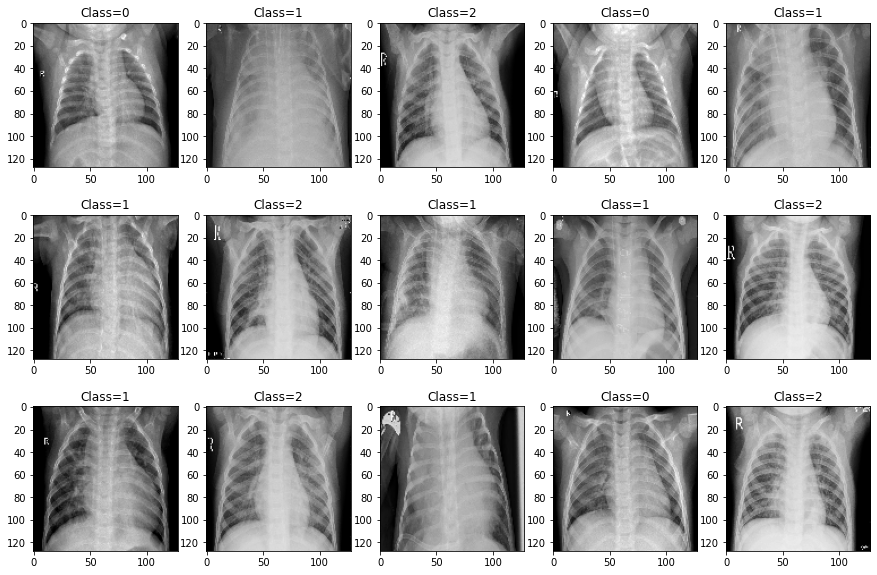

In [ ]:
plt.figure(figsize=(15,10))
for i in range(3):
    for j in range(5):
        idx = 5*i+j
        label = y[0][idx]
        plt.subplot(3,5,idx+1)
        im = np.squeeze(x[0][idx])
        plt.imshow(im)
        plt.title('Class='+str(label))

Get total count of images in each category

In [ ]:
total_normal, tot_bacterial, total_viral = 0, 0, 0
for i in range(3):
  # Returns a list of filepaths ending with .jpeg extension in the source directory and its sub-directories
  src_path = [os.path.join(dp, f) for dp, dn, filenames in os.walk(src_filepaths[i]) for f in filenames if os.path.splitext(f)[1] == '.jpeg']

  count_normal, count_bacterial, count_viral = 0, 0, 0

  for filepath in src_path:
    val = set_label(filepath)
    if val == 0:
      count_normal+=1
    elif val==1:
      count_bacterial+=1
    else:
      count_viral+=1
  
  print(names[i], count_normal, count_bacterial, count_viral)


train 1341 2530 1345
validation 8 8 0
test 234 242 148


## Code to load data, from [SPP-COVID-Net](https://github.com/SitiRaihanah/SPP-COVID-Net/blob/master/SPP-COVID-Net.py)

In [ ]:
# parameters, train pterygium for 250 normal and 250 pterygium - test: 271 normal and 78 pterygium
# covid_19_dir="C:/Users/asyra/Desktop/database/covid19 radiography database/COVID-19"
# normal_dir="C:/Users/asyra/Desktop/database/covid19 radiography database/NORMAL"
# viral_pneumonia_dir="C:/Users/asyra/Desktop/database/covid19 radiography database/Viral Pneumonia"

In [ ]:
# class_no=3
# image_size=128

In [ ]:
# covid_19_name=my_read.get_all_non_hidden_files(covid_19_dir,'png','~')
# normal_name=my_read.get_all_non_hidden_files(normal_dir,'png','~')
# viral_pneumonia_name=my_read.get_all_non_hidden_files(viral_pneumonia_dir,'png','~')

In [ ]:
# for i in range(len(covid_19_name)):
#     read_image=cv2.imread(covid_19_name[i])
#     read_image=cv2.resize(read_image,(image_size,image_size))
#     read_image=read_image.reshape(1,read_image.shape[0],read_image.shape[1],read_image.shape[2])
#     if i==0:
#         covid_image=np.copy(read_image)
#     else:
#         covid_image=np.append(covid_image,read_image,axis=0)

# for i in range(len(normal_name)):
#     read_image=cv2.imread(normal_name[i])
#     read_image=cv2.resize(read_image,(image_size,image_size))
#     read_image=read_image.reshape(1,read_image.shape[0],read_image.shape[1],read_image.shape[2])
#     if i==0:
#         normal_image=np.copy(read_image)
#     else:
#         normal_image=np.append(normal_image,read_image,axis=0)

# for i in range(len(viral_pneumonia_name)):
#     read_image=cv2.imread(viral_pneumonia_name[i])
#     read_image=cv2.resize(read_image,(image_size,image_size))
#     read_image=read_image.reshape(1,read_image.shape[0],read_image.shape[1],read_image.shape[2])
#     if i==0:
#         pneumonia_image=np.copy(read_image)
#     else:
#         pneumonia_image=np.append(pneumonia_image,read_image,axis=0)

In [ ]:
# fold_no=5
# covid_div_data=[0]
# normal_div_data=[0]
# pneumonia_div_data=[0]
# for i in range(fold_no):
#     covid_div_data.append(int((i+1)*len(covid_image)/fold_no))
#     normal_div_data.append(int((i+1)*len(normal_image)/fold_no))
#     pneumonia_div_data.append(int((i+1)*len(pneumonia_image)/fold_no))
    
# #create one hot for train data
# covid_label=np.zeros((covid_image.shape[0],class_no))
# covid_label[:,0]=1

# normal_label=np.zeros((normal_image.shape[0],class_no))
# normal_label[:,1]=1

# pneumonia_label=np.zeros((pneumonia_image.shape[0],class_no))
# pneumonia_label[:,2]=1
# print("finish loading data and labels")

# Train, Validation and Test Split

train, validation and test split using h5file and sklearn <br>
[Reference](https://www.machinecurve.com/index.php/2020/11/16/how-to-easily-create-a-train-test-split-for-your-machine-learning-model/)

> Shuffling (i.e. randomly drawing) samples is applied as part of the fit. Using a random_state, we can seed the random numbers generator to make its behavior replicable.

In [ ]:
random_state=33

- Training  : 80%
- Validation: 10%
- Test      : 10%

x and y are loaded from h5 file

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x[0], y[0], test_size=0.2, random_state=random_state)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=random_state)

In [83]:
print('No. of training images = ', x_train.shape[0])
print('No. of validation images = ', x_val.shape[0])
print('No. of test images = ', x_test.shape[0])

No. of training images =  4172
No. of validation images =  522
No. of test images =  522


In [73]:
x_train.shape

(4172, 128, 128, 1)

# Model Training

**Required:** <br>
1. Load all 
 - normal images to a numpy array (normal_image)
 - all bacterail pneumonia images to a numpy array (bacteria_image)
 - all viral pneumonia images to a numpy array (viral_image) 
<br>

2. Similarly, load corresponding labels to numpy arrays normal_label, bacteria_label, viral_label, repectively.
3. Create [np.arange()](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) division points for image data as normal_div_data, bacteria_div_data, viral_div_data.
4. Create one hot vectors as labels - normal_label, bacterial_label and viral_label

> _Go to section 'code to load data, from SPP-COVID-Net'_
<br>

In [ ]:
image_size=n_px
class_no=3

In [ ]:
accuracy=[]
for iter_no in range(train_folds):
    print(str(iter_no)+" fold!")
    train_images,test_images=divide_data(iter_no,normal_image,bacteria_image,viral_image,normal_div_data,bacteria_div_data,viral_div_data)
    train_labels,test_labels=divide_data(iter_no,normal_label,bacteria_label,viral_label,normal_div_data,bacteria_div_data,viral_div_data)

    print("train_images",train_images.shape)
    print("train_labels",train_labels.shape)
    print("test_images",test_images.shape)
    print("test_labels",test_labels.shape)

    checkpoint_path="test/cp.ckpt"
    checkpoint_dir=os.path.dirname(checkpoint_path)

    #create checkpoint callback
    cp_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1)
    input_height,input_width = image_size,image_size
    model=SPPCovidNet(class_no,input_height,input_width)
    epoch_no=100
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
    H=model.fit(x=train_images,y=train_labels,epochs=epoch_no,batch_size=64,verbose=2)

    # plot the training loss and accuracy
    N = np.arange(0,epoch_no)
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(N, H.history["loss"], label="train_loss")
    plt.plot(N, H.history["acc"], label="train_acc")
    plt.title("Training Loss and Accuracy (Simple NN)")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.show(block=False)
    plt.pause(1)

    loss,acc=model.evaluate(test_images,test_labels,batch_size=1,verbose=2)
    print("current accuracy:",acc)
    accuracy.append(acc)

    tf.keras.backend.clear_session()

In [ ]:
# accuracy=[]
# for iter_no in range(fold_no):
#     print(str(iter_no)+" fold!")
#     train_images,test_images=divide_data(iter_no,covid_image,normal_image,pneumonia_image,covid_div_data,normal_div_data,pneumonia_div_data)
#     train_labels,test_labels=divide_data(iter_no,covid_label,normal_label,pneumonia_label,covid_div_data,normal_div_data,pneumonia_div_data)

#     print("train_images",train_images.shape)
#     print("train_labels",train_labels.shape)
#     print("test_images",test_images.shape)
#     print("test_labels",test_labels.shape)

#     checkpoint_path="test/cp.ckpt"
#     checkpoint_dir=os.path.dirname(checkpoint_path)

#     #create checkpoint callback
#     cp_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1)
#     input_height,input_width = image_size,image_size
#     model=SPPCovidNet(class_no,input_height,input_width)
#     epoch_no=100
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
#     H=model.fit(x=train_images,y=train_labels,epochs=epoch_no,batch_size=64,verbose=2)

#     # plot the training loss and accuracy
#     N = np.arange(0,epoch_no)
#     plt.style.use("ggplot")
#     plt.figure()
#     plt.plot(N, H.history["loss"], label="train_loss")
#     plt.plot(N, H.history["acc"], label="train_acc")
#     plt.title("Training Loss and Accuracy (Simple NN)")
#     plt.xlabel("Epoch #")
#     plt.ylabel("Loss/Accuracy")
#     plt.legend()
#     plt.show(block=False)
#     plt.pause(1)

#     loss,acc=model.evaluate(test_images,test_labels,batch_size=1,verbose=2)
#     print("current accuracy:",acc)
#     accuracy.append(acc)

#     tf.keras.backend.clear_session()

In [ ]:
accuracy=np.array(accuracy)
print("accuracy",accuracy)
mean_accuracy=np.mean(accuracy,axis=0)
print("mean_accuracy",mean_accuracy)